In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_california_housing

In [5]:
california = fetch_california_housing(as_frame = True)

In [6]:
df = california.frame

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.rename(columns = {'MedHouseVal': 'PRICE'}, inplace = True)
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [10]:
df.shape

(20640, 9)

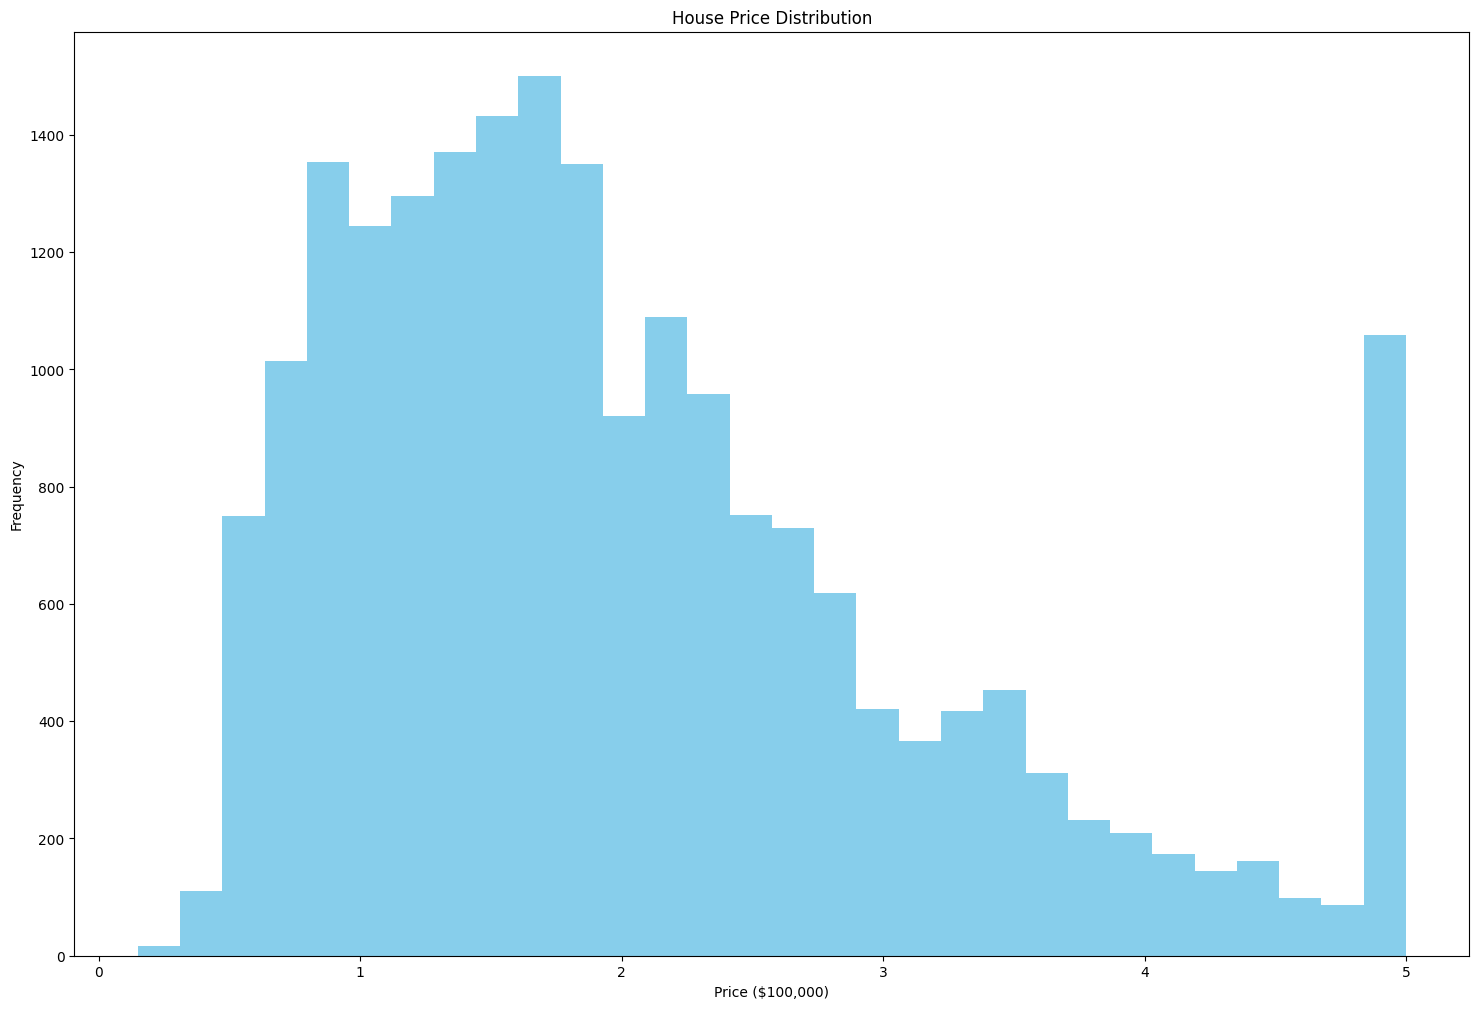

In [12]:
plt.figure(figsize = (18,12))
plt.hist(df['PRICE'], bins = 30, color = 'skyblue')
plt.title('House Price Distribution')
plt.xlabel('Price ($100,000)')
plt.ylabel('Frequency')
plt.show()

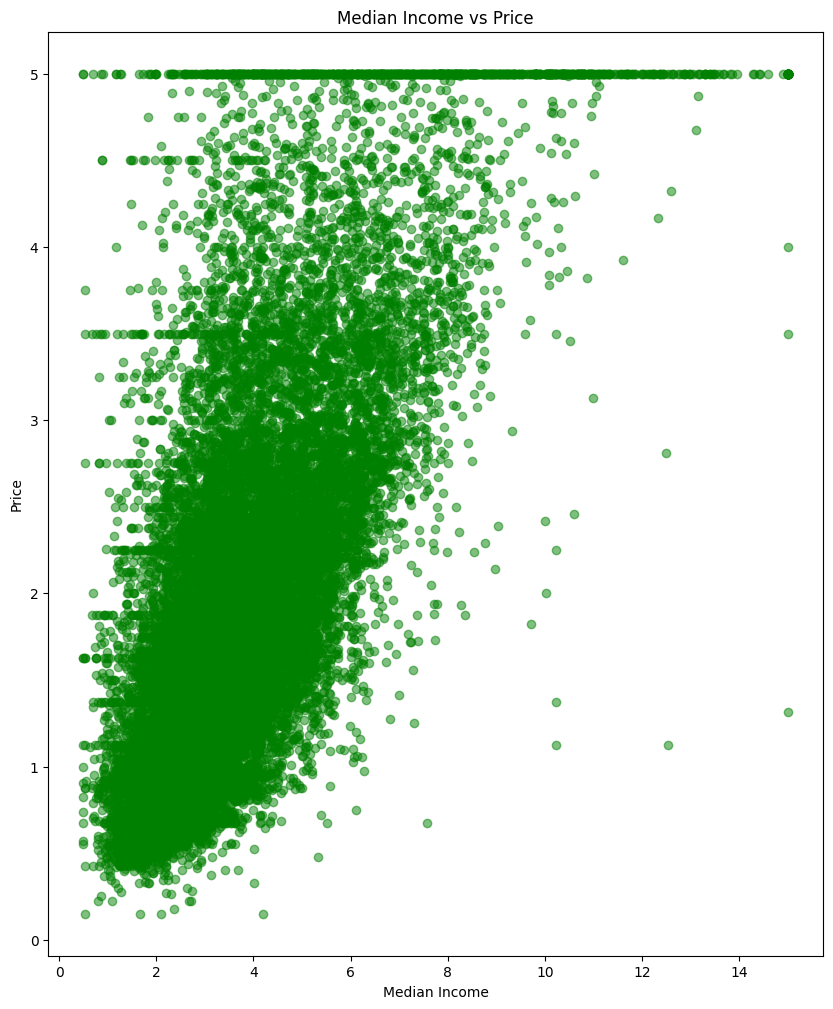

In [14]:
plt.figure(figsize = (10,12))
plt.scatter(df['MedInc'], df['PRICE'], alpha = 0.5, color = 'green')
plt.title('Median Income vs Price')
plt.xlabel('Median Income')
plt.ylabel('Price')
plt.show()


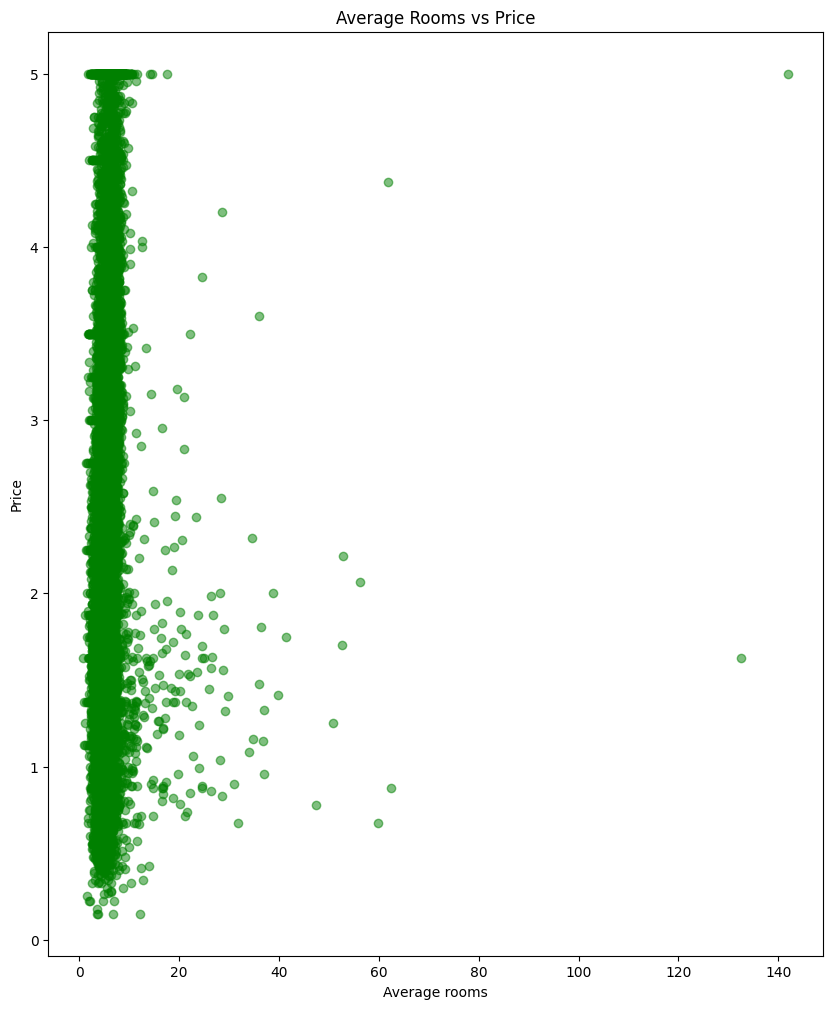

In [15]:
plt.figure(figsize = (10,12))
plt.scatter(df['AveRooms'], df['PRICE'], alpha = 0.5, color = 'green')
plt.title('Average Rooms vs Price')
plt.xlabel('Average rooms')
plt.ylabel('Price')
plt.show()


In [17]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [18]:
IQR = q3-q1

In [21]:
df = df[~((df<(q1-1.5*IQR)) | (df > (q3 + 1.5*IQR))).any(axis = 1)]

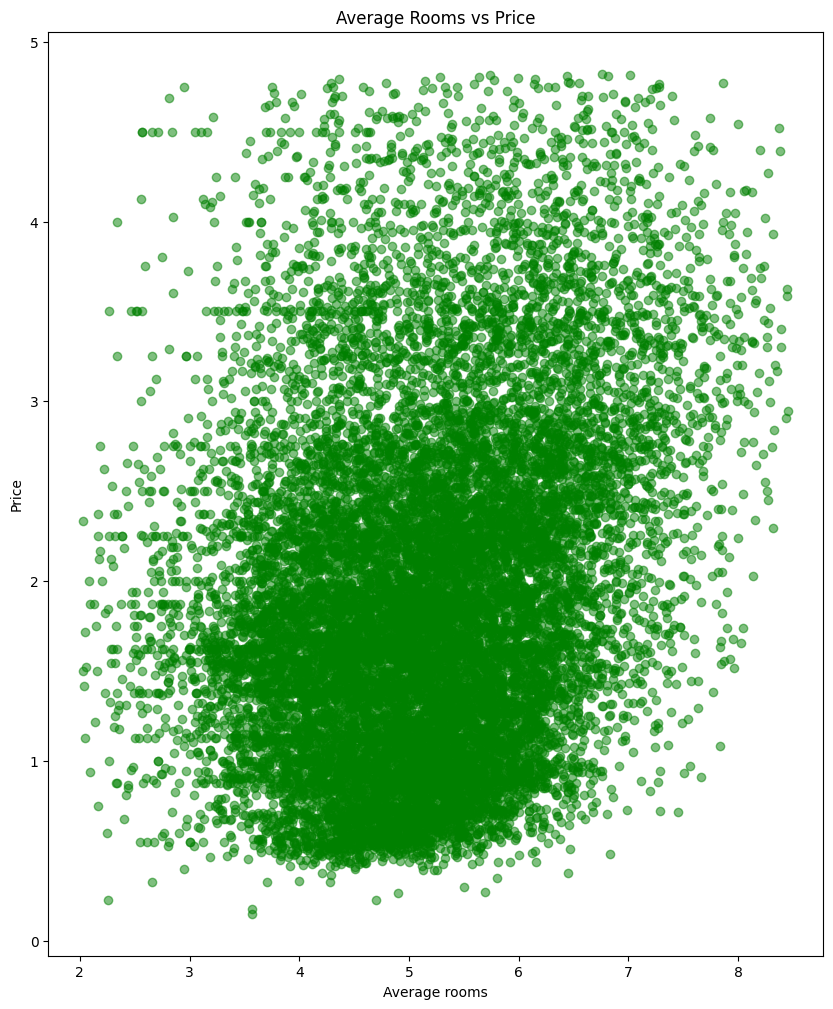

In [22]:
plt.figure(figsize = (10,12))
plt.scatter(df['AveRooms'], df['PRICE'], alpha = 0.5, color = 'green')
plt.title('Average Rooms vs Price')
plt.xlabel('Average rooms')
plt.ylabel('Price')
plt.show()


Text(0, 0.5, 'Price ($100,000s)')

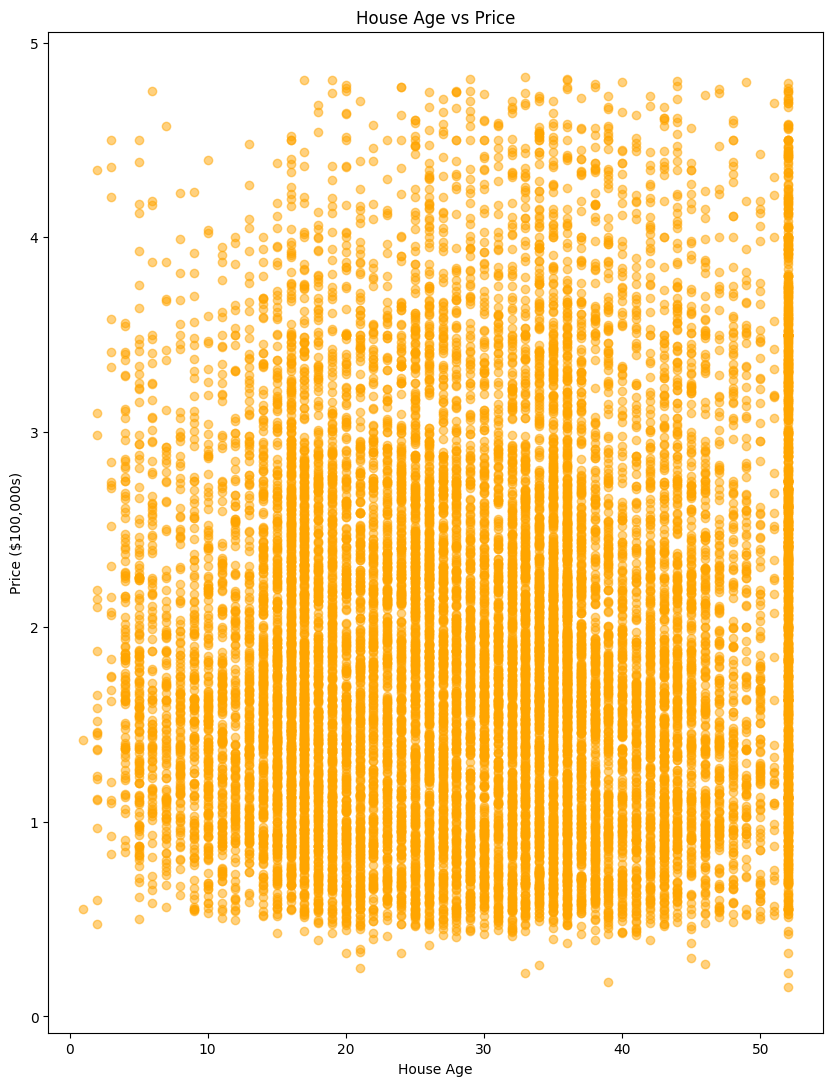

In [23]:
plt.figure(figsize = (10,13))

plt.scatter(df['HouseAge'], df['PRICE'], alpha=0.5, color='orange')
plt.title('House Age vs Price')
plt.xlabel('House Age')
plt.ylabel('Price ($100,000s)')

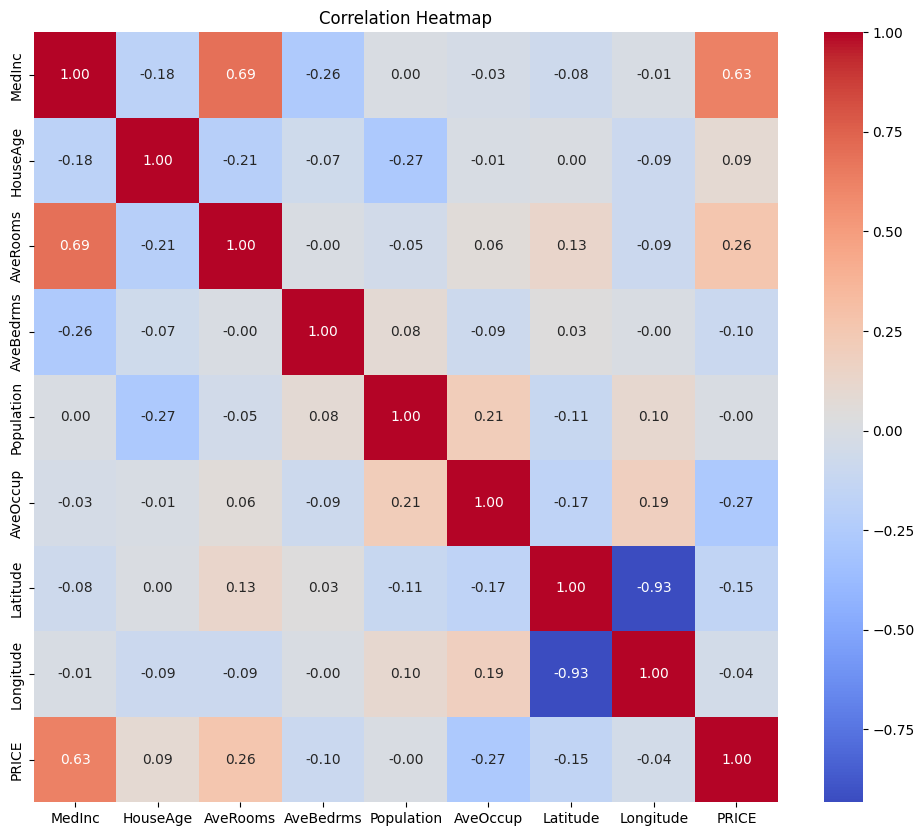

In [24]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

In [25]:
df['PRICE'].value_counts()

PRICE
1.375    87
1.625    82
1.875    75
2.250    73
1.125    72
         ..
4.090     1
3.030     1
3.064     1
4.330     1
0.470     1
Name: count, Length: 3637, dtype: int64

In [26]:
df.shape

(16489, 9)

In [28]:
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train
                                       )
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).flatten()

In [34]:
model = models.Sequential([
    layers.Dense(40, activation = 'relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(), 
    layers.Dropout(0.3),

    layers.Dense(30, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(20, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(10, activation = 'relu'),
    layers.Dropout(0.2),

    layers.Dense(1,activation = 'linear')
])

In [36]:
model.compile(optimizer = optimizers.Adam(learning_rate = 0.01),
            loss ='mse',
            metrics = ['mae'])

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 40)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 40)                  │             160 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           1,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 20)                  │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,791 (10.90 KB)

 Trainable params: 2,611 (10.20 KB)

 Non-trainable params: 180 (720.00 B)

In [43]:
callback_list = [callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights = True), 
                callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 10, min_lr = 0.01)]


In [44]:
history = model.fit(X_train_scaled, y_train_scaled, 
                   validation_split = 0.2, 
                   epochs = 10, 
                   batch_size = 32, 
                   callbacks = callback_list, 
                   verbose = 1)

Epoch 1/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9889 - mae: 0.8056 - val_loss: 1.0010 - val_mae: 0.8121 - learning_rate: 0.0100
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0041 - mae: 0.8106 - val_loss: 1.0007 - val_mae: 0.8026 - learning_rate: 0.0100
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0131 - mae: 0.8100 - val_loss: 1.0000 - val_mae: 0.8094 - learning_rate: 0.0100
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0064 - mae: 0.8091 - val_loss: 1.0033 - val_mae: 0.8159 - learning_rate: 0.0100
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0072 - mae: 0.8171 - val_loss: 1.0004 - val_mae: 0.8031 - learning_rate: 0.0100
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9887 - mae: 0.7989 - val_loss: 1.0018 - val_mae: 0.8134 - learning_rate: 0.0100
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0127 - mae: 0.8159 - val_loss: 1.0004 - val_mae: 0.8032 - learning_rate: 0.0100
Epoch 

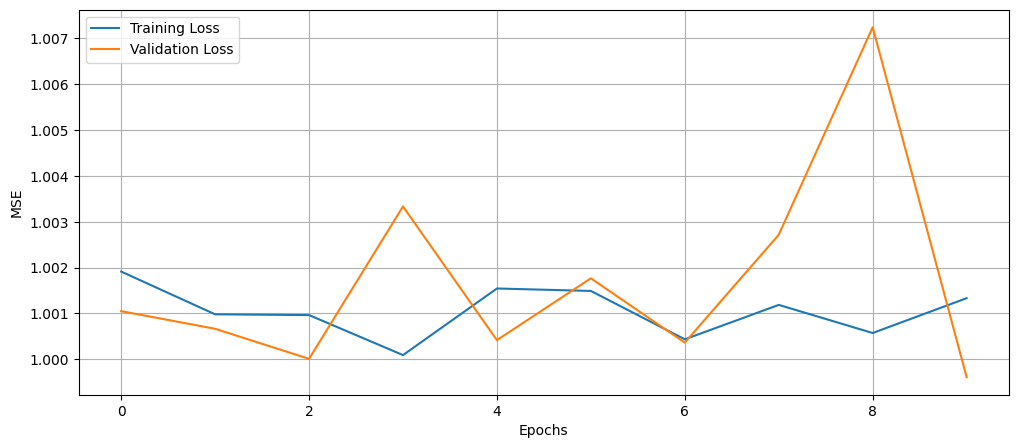

In [45]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('MSE'); plt.legend(); plt.grid(True)
plt.show()

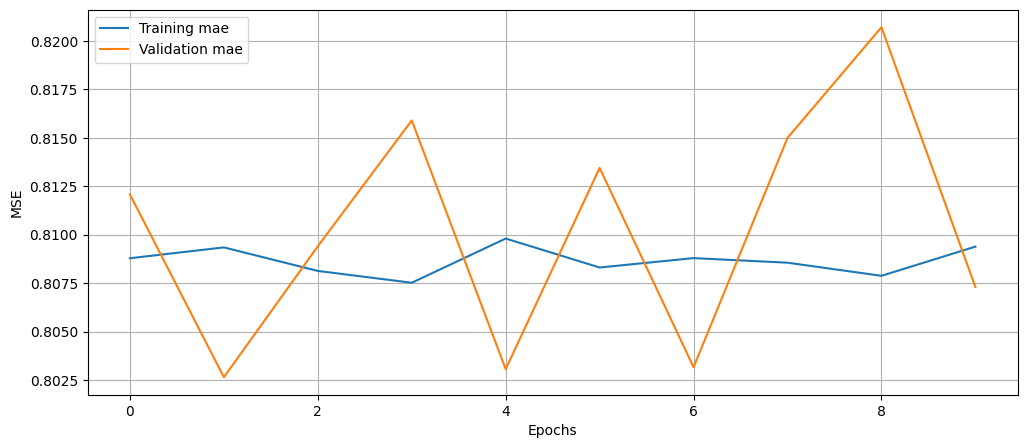

In [46]:
plt.figure(figsize=(12,5))
plt.plot(history.history['mae'], label = 'Training mae')
plt.plot(history.history['val_mae'], label = 'Validation mae')
plt.xlabel('Epochs'); plt.ylabel('MSE'); plt.legend(); plt.grid(True)
plt.show()

In [47]:
y_pred_scaled = model.predict(X_test_scaled).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
mse = mean_squared_error(y_test, y_pred)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [48]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred
             )
rmse = np.sqrt(mse)

In [49]:
mse

0.8580797585735528

In [50]:
mae

0.7477757965143411

In [51]:
r2

-3.25572237314109e-05

In [52]:
rmse

0.9263259461839298